Importing the Dependencies

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score

Data Collection & Processing

In [12]:
# loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv('calories.csv')

In [14]:
# print the first 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [15]:
exercise_data = pd.read_csv('exercise.csv')

In [16]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the two Dataframes

In [17]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [18]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [19]:
# checking the number of rows and columns
calories_data.shape

(15000, 9)

In [20]:
# getting some informations about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [21]:
# checking for missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis

In [22]:
# get some statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [23]:
sns.set()

C:\Users\Akshi\AppData\Local\Temp\ipykernel_34888\1276426137.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=calories_data, palette='cool')


<Axes: xlabel='Gender', ylabel='count'>

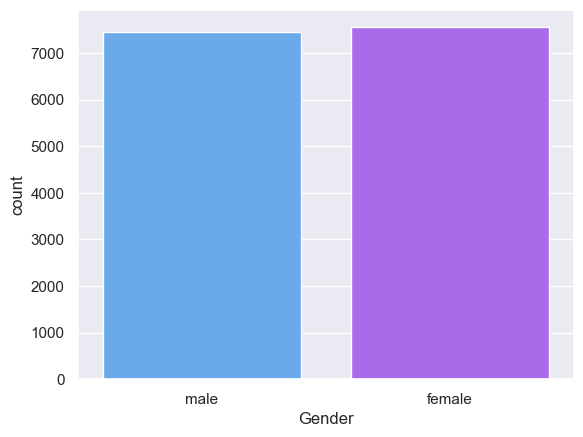

In [25]:
 #plotting the gender column in count plot
sns.countplot(x='Gender', data=calories_data, palette='cool')

C:\Users\Akshi\AppData\Local\Temp\ipykernel_34888\2692780257.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'],  color='g', kde=True)


<Axes: xlabel='Age', ylabel='Density'>

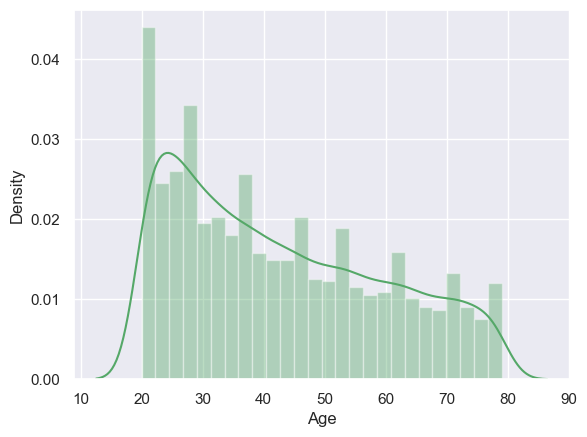

In [26]:
# finding the distribution of "Age" column
sns.distplot(calories_data['Age'],  color='g', kde=True)

C:\Users\Akshi\AppData\Local\Temp\ipykernel_34888\454660312.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'], color='g', kde=True)


<Axes: xlabel='Height', ylabel='Density'>

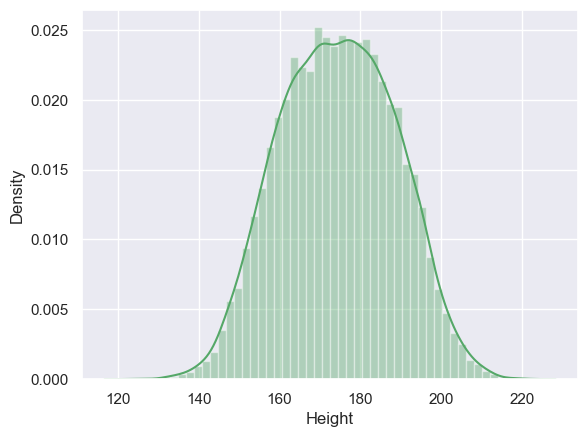

In [27]:
# finding the distribution of "Height" column
sns.distplot(calories_data['Height'], color='g', kde=True)

C:\Users\Akshi\AppData\Local\Temp\ipykernel_34888\660631756.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'], color='g', kde=True)


<Axes: xlabel='Weight', ylabel='Density'>

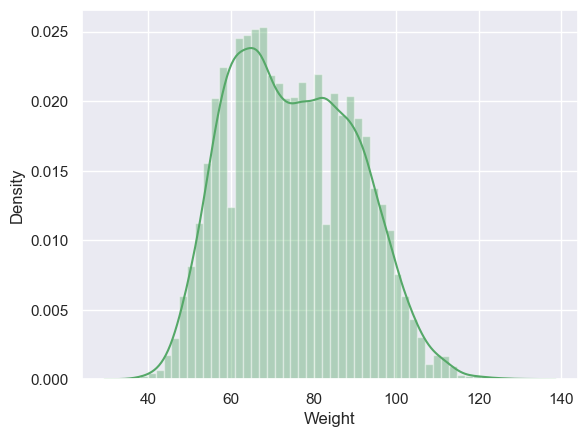

In [28]:
# finding the distribution of "Weight" column
sns.distplot(calories_data['Weight'], color='g', kde=True)

C:\Users\Akshi\AppData\Local\Temp\ipykernel_34888\1562101221.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Heart_Rate'], color='g', kde=True)


<Axes: xlabel='Heart_Rate', ylabel='Density'>

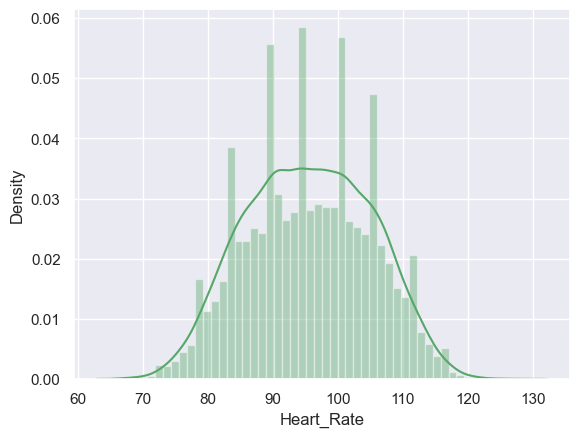

In [29]:
# finding the distribution of "Heart_Rate" column
sns.distplot(calories_data['Heart_Rate'], color='g', kde=True)

Finding the Correlation in the dataset

1. Positive Correlation
2. Negative Correlation

In [30]:
numeric_data = calories_data.select_dtypes(include=[float, int])
correlation = numeric_data.corr()

<Axes: >

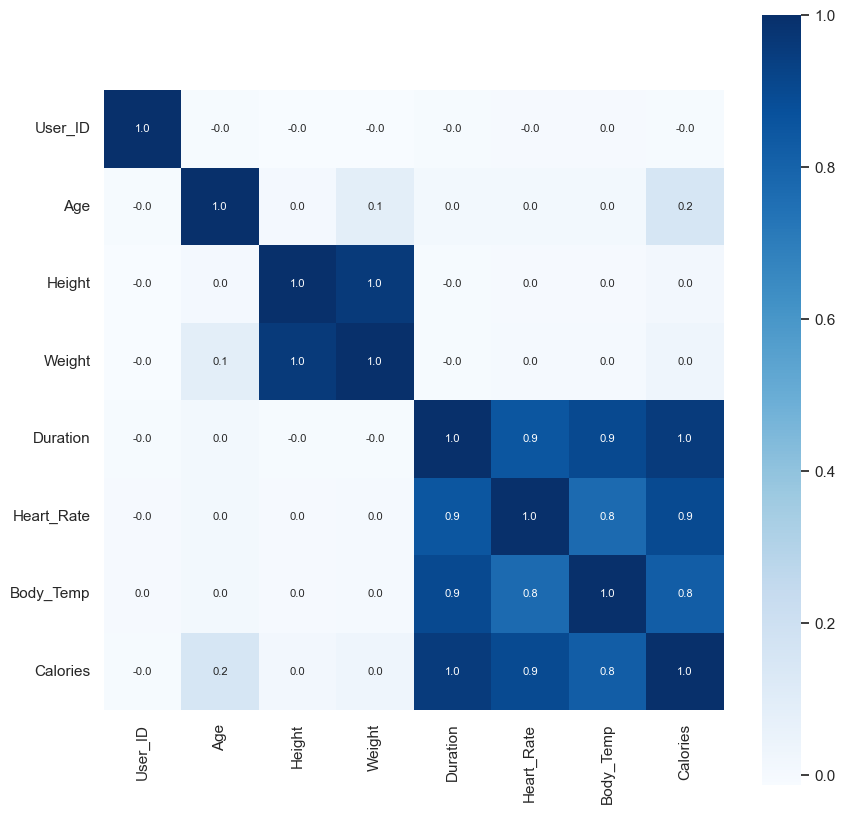

In [31]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Converting the text data to numerical values

In [32]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

C:\Users\Akshi\AppData\Local\Temp\ipykernel_34888\2713499166.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)


In [33]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Separating features and Target

In [34]:
X = calories_data.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_data['Calories']

In [35]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [36]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting the data into training data and Test data

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=80) # test_size=0.2 means 20% data will be test data and 80% data will be train data

In [79]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model Training

1. RandomForestRegressor

In [80]:
# loading the model
model = RandomForestRegressor()

In [81]:
# training the model with X_train
model.fit(X_train, Y_train)

RandomForestRegressor()

Evaluation

Prediction on Test Data

In [82]:
test_data_prediction = model.predict(X_test)

In [83]:
print("Predicted Data")
print(test_data_prediction.tolist())

Predicted Data
[5.78, 107.13, 52.7, 96.09, 181.1, 93.44, 20.76, 140.52, 7.31, 30.37, 5.13, 200.45, 60.77, 13.64, 184.95, 42.99, 67.07, 130.32, 112.31, 99.9, 73.61, 141.02, 2.69, 169.77, 94.35, 99.69, 132.03, 19.53, 112.55, 34.93, 29.19, 3.91, 148.44, 177.89, 114.11, 217.58, 124.38, 57.24, 21.64, 113.77, 162.75, 13.27, 223.13, 35.79, 10.63, 43.87, 29.15, 142.46, 7.01, 91.0, 184.46, 153.95, 95.56, 49.06, 144.68, 102.33, 23.43, 9.68, 58.03, 135.27, 9.51, 127.15, 20.41, 19.04, 13.4, 111.62, 165.71, 14.72, 29.98, 3.46, 17.68, 225.67, 114.4, 169.21, 194.8, 81.84, 17.64, 107.35, 79.17, 20.02, 180.18, 31.49, 232.9, 19.81, 144.09, 102.77, 183.84, 37.37, 25.61, 65.0, 42.33, 44.58, 189.19, 56.18, 133.73, 4.23, 11.66, 14.14, 136.6, 136.56, 129.89, 20.64, 127.17, 114.47, 165.66, 40.5, 112.26, 158.51, 63.41, 231.64, 25.63, 202.52, 153.98, 118.72, 123.27, 20.22, 97.25, 87.16, 55.93, 108.87, 154.39, 58.15, 47.31, 191.21, 47.21, 118.96, 78.85, 88.49, 224.55, 209.68, 36.41, 37.25, 83.25, 113.27, 164.02,

In [84]:
print("Original Data\n")
print(Y_test.tolist())

Original Data

[6.0, 108.0, 51.0, 95.0, 183.0, 94.0, 20.0, 140.0, 7.0, 30.0, 5.0, 206.0, 61.0, 14.0, 187.0, 44.0, 65.0, 135.0, 114.0, 99.0, 75.0, 137.0, 3.0, 166.0, 97.0, 99.0, 134.0, 19.0, 113.0, 35.0, 30.0, 4.0, 148.0, 171.0, 115.0, 218.0, 123.0, 58.0, 22.0, 114.0, 166.0, 14.0, 223.0, 37.0, 11.0, 44.0, 30.0, 144.0, 7.0, 89.0, 183.0, 154.0, 99.0, 51.0, 145.0, 97.0, 24.0, 10.0, 59.0, 142.0, 9.0, 129.0, 21.0, 18.0, 13.0, 109.0, 159.0, 14.0, 31.0, 3.0, 18.0, 227.0, 114.0, 170.0, 195.0, 84.0, 19.0, 108.0, 80.0, 19.0, 168.0, 32.0, 226.0, 19.0, 144.0, 107.0, 185.0, 38.0, 25.0, 71.0, 42.0, 43.0, 190.0, 57.0, 134.0, 4.0, 12.0, 14.0, 142.0, 137.0, 130.0, 21.0, 127.0, 111.0, 167.0, 40.0, 109.0, 159.0, 64.0, 238.0, 27.0, 200.0, 142.0, 124.0, 125.0, 20.0, 97.0, 88.0, 58.0, 111.0, 165.0, 57.0, 47.0, 191.0, 49.0, 114.0, 79.0, 87.0, 227.0, 207.0, 37.0, 37.0, 84.0, 108.0, 163.0, 43.0, 147.0, 10.0, 155.0, 106.0, 76.0, 62.0, 109.0, 6.0, 73.0, 73.0, 27.0, 68.0, 79.0, 190.0, 103.0, 112.0, 212.0, 29.0, 14

Mean Absolute Error

In [85]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  1.6964333333333335


Accuracy of RandomForestRegressor Model

In [86]:
test_data_prediction_classes = np.round(test_data_prediction).astype(int)
accuracy = accuracy_score(Y_test, test_data_prediction_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 30.13%


2. XGBRegressor

In [87]:
# loading the model
model = XGBRegressor()

In [88]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

Prediction on Test Data

In [89]:
test_data_prediction = model.predict(X_test)

In [90]:
print("Predicted Data")
print(test_data_prediction.tolist())

Predicted Data
[5.843114852905273, 111.78021240234375, 50.151180267333984, 96.17544555664062, 180.92654418945312, 94.42916870117188, 21.110902786254883, 142.60345458984375, 7.091348171234131, 30.86085319519043, 5.576639175415039, 198.99264526367188, 64.40606689453125, 14.307689666748047, 186.46299743652344, 44.74821090698242, 65.51925659179688, 137.1627655029297, 113.51466369628906, 98.81626892089844, 71.58110809326172, 136.24490356445312, 3.187955856323242, 164.27252197265625, 91.45443725585938, 97.6349105834961, 137.13514709472656, 21.144926071166992, 113.71981048583984, 35.449363708496094, 29.60894203186035, 3.9812581539154053, 147.30894470214844, 172.27935791015625, 115.30122375488281, 217.79730224609375, 125.92295837402344, 58.4179801940918, 22.96023941040039, 115.91175079345703, 168.58053588867188, 14.290608406066895, 224.75453186035156, 34.663429260253906, 10.888275146484375, 43.22615051269531, 29.747684478759766, 142.1717987060547, 6.921370029449463, 90.5467529296875, 182.61808

In [91]:
print("Original Data\n")
print(Y_test.tolist())

Original Data

[6.0, 108.0, 51.0, 95.0, 183.0, 94.0, 20.0, 140.0, 7.0, 30.0, 5.0, 206.0, 61.0, 14.0, 187.0, 44.0, 65.0, 135.0, 114.0, 99.0, 75.0, 137.0, 3.0, 166.0, 97.0, 99.0, 134.0, 19.0, 113.0, 35.0, 30.0, 4.0, 148.0, 171.0, 115.0, 218.0, 123.0, 58.0, 22.0, 114.0, 166.0, 14.0, 223.0, 37.0, 11.0, 44.0, 30.0, 144.0, 7.0, 89.0, 183.0, 154.0, 99.0, 51.0, 145.0, 97.0, 24.0, 10.0, 59.0, 142.0, 9.0, 129.0, 21.0, 18.0, 13.0, 109.0, 159.0, 14.0, 31.0, 3.0, 18.0, 227.0, 114.0, 170.0, 195.0, 84.0, 19.0, 108.0, 80.0, 19.0, 168.0, 32.0, 226.0, 19.0, 144.0, 107.0, 185.0, 38.0, 25.0, 71.0, 42.0, 43.0, 190.0, 57.0, 134.0, 4.0, 12.0, 14.0, 142.0, 137.0, 130.0, 21.0, 127.0, 111.0, 167.0, 40.0, 109.0, 159.0, 64.0, 238.0, 27.0, 200.0, 142.0, 124.0, 125.0, 20.0, 97.0, 88.0, 58.0, 111.0, 165.0, 57.0, 47.0, 191.0, 49.0, 114.0, 79.0, 87.0, 227.0, 207.0, 37.0, 37.0, 84.0, 108.0, 163.0, 43.0, 147.0, 10.0, 155.0, 106.0, 76.0, 62.0, 109.0, 6.0, 73.0, 73.0, 27.0, 68.0, 79.0, 190.0, 103.0, 112.0, 212.0, 29.0, 14

In [92]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  1.4699064764529466


Accuracy of XGBRegressor Model

In [93]:
test_data_prediction_classes = np.round(test_data_prediction).astype(int)
accuracy = accuracy_score(Y_test, test_data_prediction_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 27.03%
